In [11]:
import IPython
import numpy as np
from scipy.io.wavfile import read as wavread
import matplotlib.pyplot as mp
import math
import scipy.signal as ss

In [12]:
def stft(input_sound, dft_size, hop_size, zero_pad, window):
    if input_sound.ndim == 1:
        sample_num = math.floor(len(input_sound)/hop_size)+1
        result = []
        for i in range(sample_num):
            
            dft_sample = []
            dft_sample = input_sound[i * hop_size: min(i * hop_size + dft_size, len(input_sound)-1)]
            if len(dft_sample) < dft_size:
                dft_sample = np.append(dft_sample,np.zeros(dft_size-len(dft_sample)))            
            windowed_sample = np.multiply(dft_sample, window)
            fft_result = np.fft.rfft(windowed_sample,dft_size+zero_pad)
            result.append(fft_result)    
        return np.array(result)
    elif input_sound.ndim == 2:
        sample_num = input_sound.shape[0]
        length = (sample_num-1) * hop_size + dft_size
        result = np.zeros(length)
        add_time = np.zeros(length)
        for i in range(sample_num):
            ifft_result = np.fft.irfft(input_sound[i], dft_size + zero_pad)
            unwindowed_sample = np.multiply(ifft_result[:dft_size], window)
            start = i*hop_size
            for j in range(dft_size):
                result[start+j] += unwindowed_sample[j]
        return result
    else:
        print("invalid input")   
        return

In [13]:
def plot_wav(sample_rate, input_sound):
    dft_size = 400
    hop_size = int(dft_size/8)
    zero_pad = 0
    window = np.hanning(dft_size+zero_pad)
    IPython.display.display( IPython.display.Audio( input_sound, rate=sample_rate)) 
    nyq = int(sample_rate/2)
    time = np.linspace(0, len(input_sound)/sample_rate, len(input_sound))
    mp.plot(time, input_sound)    
    mp.xlabel("second")
    mp.show()
    dft = stft(input_sound, dft_size, hop_size, zero_pad,window)
    dft_r = np.absolute(dft) ** 0.3
    time_v = np.linspace(0,dft_r.shape[0] * hop_size / sample_rate,dft_r.shape[0])
    freq_v = np.linspace(0, max(np.fft.fftfreq(len(input_sound),d=(1.0/sample_rate))), int((dft_size+zero_pad)/2 + 1))
    mp.xlabel("second")
    mp.ylabel("HZ")
    mp.pcolormesh(time_v,freq_v,dft_r.T)
    mp.show()

In [14]:
def plot_filter(sample_rate, input_filter, output = 'fir', title = 'filter'):
    if output == 'fir':
        w,h = ss.freqz(input_filter)
    elif output == 'ba':
        w,h = ss.freqs(input_filter[0], input_filter[1])
    mp.plot(w * sample_rate /(2*np.pi),abs(h))
    mp.title(title)
    mp.xlabel('Frequency')
    mp.show()

In [33]:
#odorous

In [51]:
def my_fir_filter(lenth, freq, pass_zero = True):
    arr = np.zeros(lenth)
    lenth2 = math.ceil(lenth/2)
    if isinstance(freq, list) == False:
        if pass_zero == True:
            for i in range(lenth):
                arr[i] = freq * np.sinc((i - lenth2) * freq)
        else:            
            for i in range(lenth):
                n = i - lenth2
                if n == 0:
                    arr[i] = 1 - freq * np.sinc(n * freq)
                else:
                    arr[i] = -freq * np.sinc(n * freq)
    else:
        freq_b = (freq[1] - freq[0])/2
        freq_c = (freq[1] + freq[0])/2  
        print(freq_b, freq_c)
        if pass_zero == True:
            for i in range(lenth):
                n = i - lenth2
                if n == 0:
                    arr[i] = 1-2 * np.cos(np.pi * n * freq_c) * freq_b * np.sinc(freq_b * n)            
                else:
                    arr[i] = -2 * np.cos(np.pi * n * freq_c) * freq_b * np.sinc(freq_b * n)
        else:            
            for i in range(lenth):
                n = i - lenth2    
                arr[i] = 2 * np.cos(np.pi * n * freq_c) * freq_b * np.sinc(freq_b * n)
    return arr

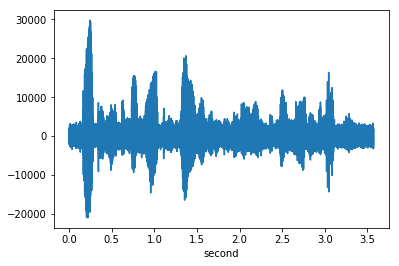

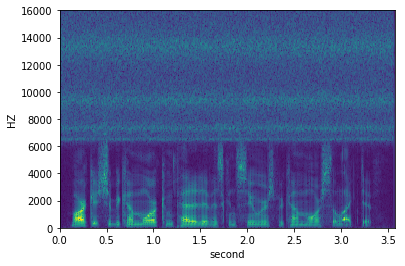

In [35]:
file_name = "case1.wav"
rate_1, wav_1 = wavread(file_name)
plot_wav(rate_1,wav_1)

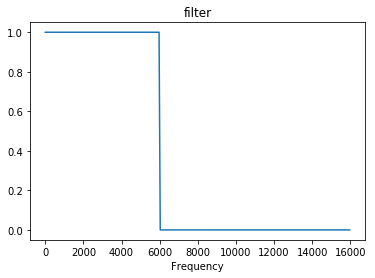

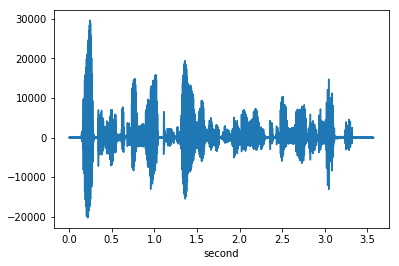

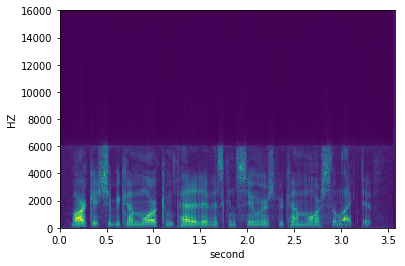

In [36]:
fltr_1 = ss.firwin(len(wav_1), 6000 * 2/rate_1)
plot_filter(rate_1, fltr_1)
wav_1_f = ss.convolve(fltr_1,wav_1)[int(len(wav_1)/2):int(len(wav_1)/2 * 3)]
plot_wav(rate_1,wav_1_f)

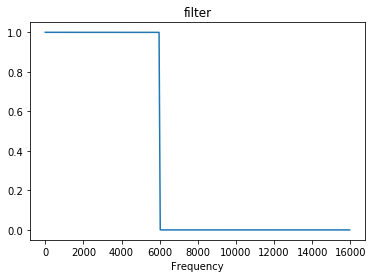

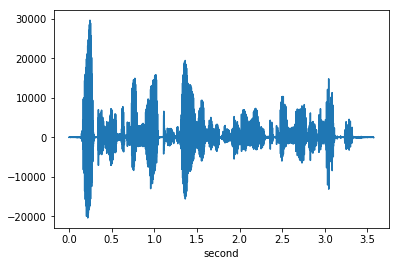

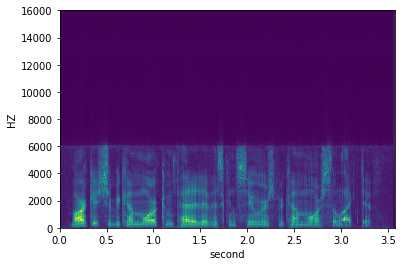

In [37]:
fltr_1 = my_fir_filter(len(wav_1), 6000 * 2/rate_1)
plot_filter(rate_1, fltr_1)
wav_1_f = ss.convolve(fltr_1,wav_1)[int(len(wav_1)/2):int(len(wav_1)/2 * 3)]
plot_wav(rate_1,wav_1_f)

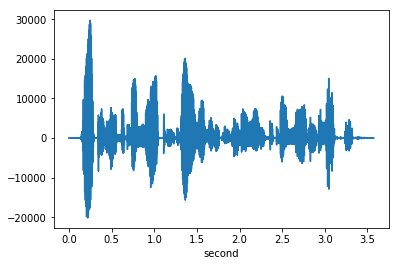

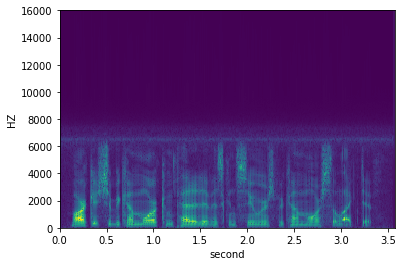

In [38]:
b , a = ss.iirfilter(20, 6000 * 2/rate_1, btype='lowpass', ftype='butter', output = 'ba')
#plot_filter(rate_1, [b,a], 'ba')
wav_1_f = ss.lfilter(b,a,wav_1)
plot_wav(rate_1,wav_1_f)

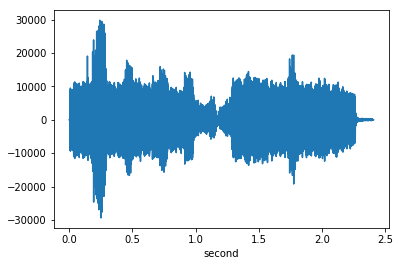

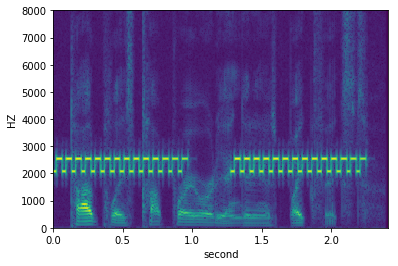

In [39]:
file_name = "case2.wav"
rate_2, wav_2 = wavread(file_name)
plot_wav(rate_2,wav_2)

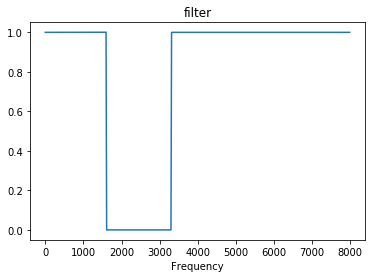

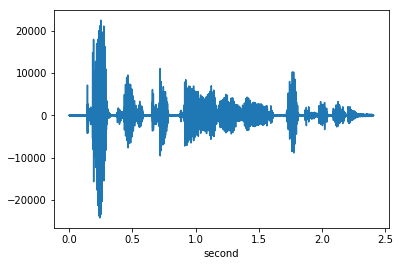

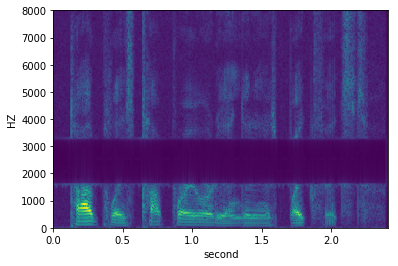

In [40]:
fltr_2 = ss.firwin(len(wav_2), [1600*2/rate_2, 3300*2/rate_2])
plot_filter(rate_2, fltr_2)
wav_2_f = ss.convolve(fltr_2,wav_2)[int(len(wav_2)/2):int(len(wav_2)/2 * 3)]
plot_wav(rate_2,wav_2_f)

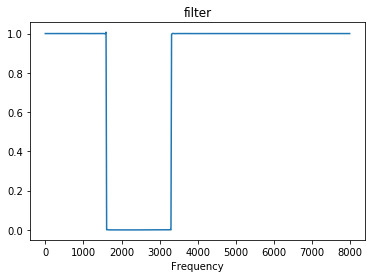

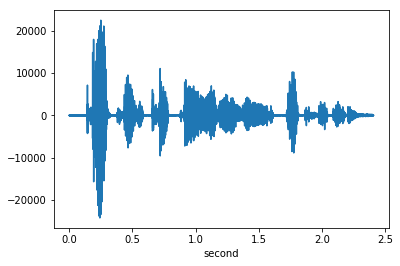

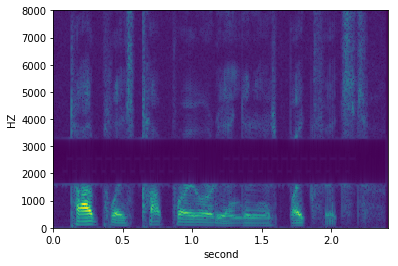

In [41]:
fltr_2 = my_fir_filter(len(wav_2), [1600*2/rate_2, 3300*2/rate_2])
plot_filter(rate_2, fltr_2)
wav_2_f = ss.convolve(fltr_2,wav_2)[int(len(wav_2)/2):int(len(wav_2)/2 * 3)]
plot_wav(rate_2,wav_2_f)

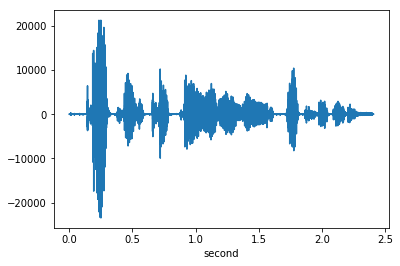

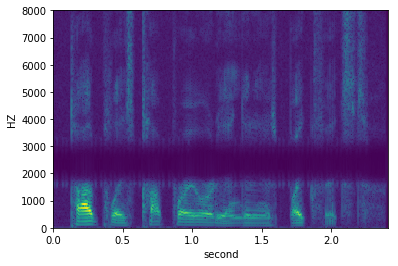

In [42]:
b,a = ss.iirfilter(10, [1600*2/rate_2, 3300*2/rate_2], btype = 'bandstop', output = 'ba')
wav_2_f = ss.lfilter(b,a,wav_2)
plot_wav(rate_2,wav_2_f)

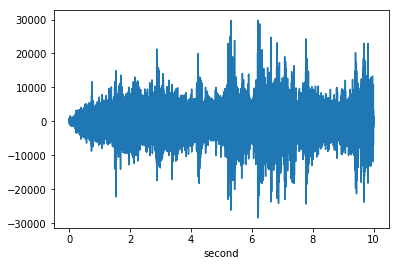

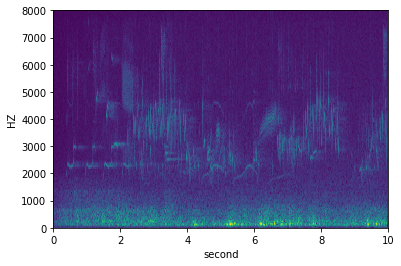

In [43]:
file_name = "case3.wav"
rate_3, wav_3 = wavread(file_name)
plot_wav(rate_3,wav_3)

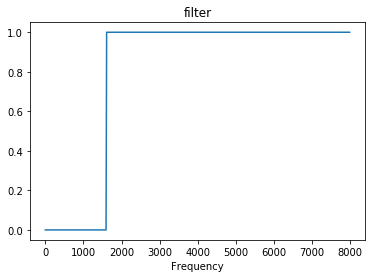

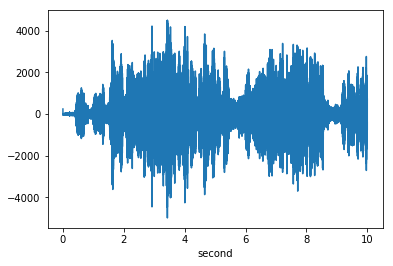

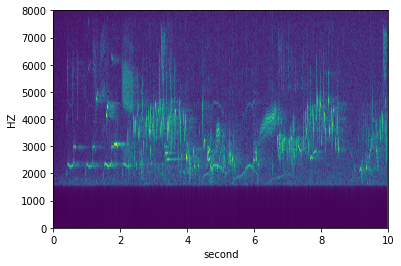

In [44]:
fltr_3 = ss.firwin(len(wav_3) - 1, 1600 * 2/rate_3, pass_zero = False)
plot_filter(rate_3, fltr_3)
wav_3_f = ss.convolve(fltr_3,wav_3)[int(len(wav_3)/2):int(len(wav_3)/2 * 3)]
plot_wav(rate_3,wav_3_f)

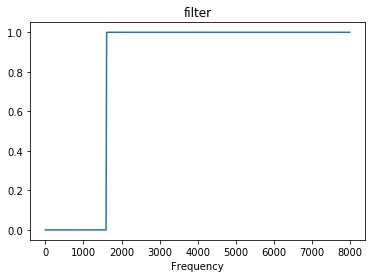

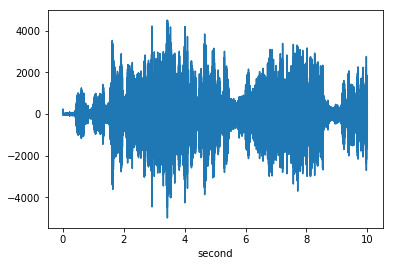

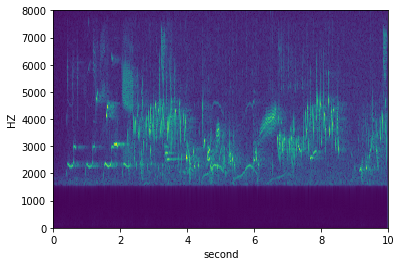

In [45]:
fltr_3 = my_fir_filter(len(wav_3), 1600 * 2/rate_3, False)
plot_filter(rate_3, fltr_3)
wav_3_f = ss.convolve(fltr_3,wav_3)[int(len(wav_3)/2):int(len(wav_3)/2 * 3)]
plot_wav(rate_3,wav_3_f)

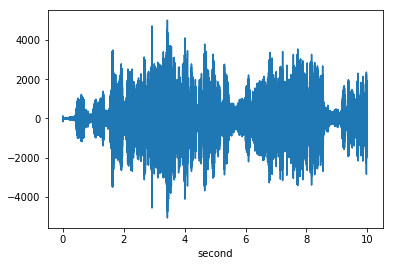

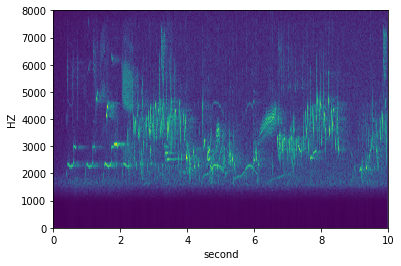

In [46]:
b,a = ss.iirfilter(20, 1600 * 2/rate_3, btype = 'highpass', output = 'ba')
wav_3_f = ss.lfilter(b,a,wav_3)
plot_wav(rate_3,wav_3_f)

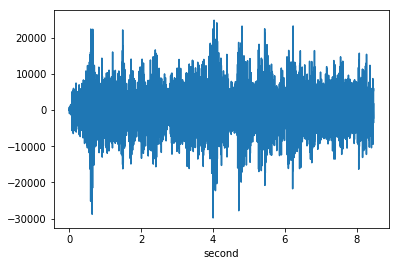

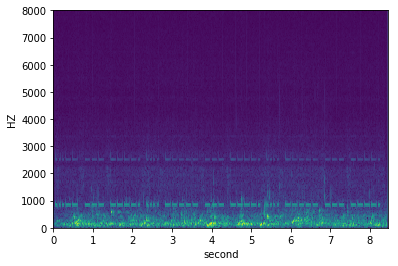

In [47]:
file_name = "case4.wav"
rate_4, wav_4 = wavread(file_name)
plot_wav(rate_4,wav_4)

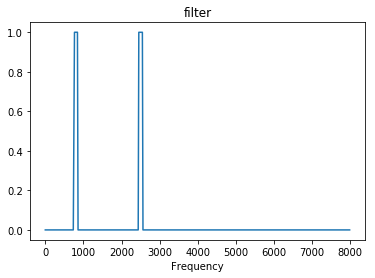

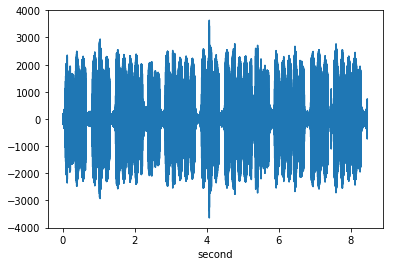

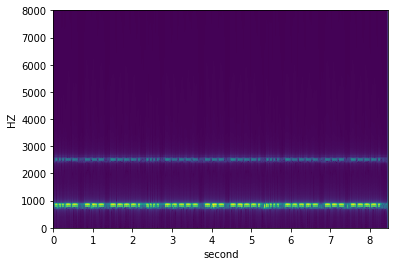

In [48]:
fltr_4 = ss.firwin(len(wav_4), [750*2/rate_4, 850*2/rate_4, 2450*2/rate_4,2550*2/rate_4], pass_zero = False)
plot_filter(rate_4, fltr_4)
wav_4_f = ss.convolve(fltr_4,wav_4)[int(len(wav_4)/2):int(len(wav_4)/2 * 3)]
plot_wav(rate_4,wav_4_f)

0.006249999999999999 0.1


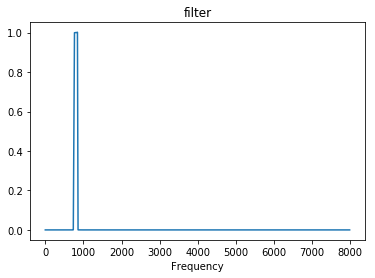

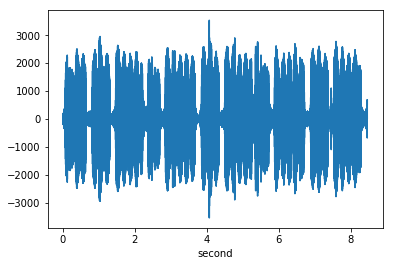

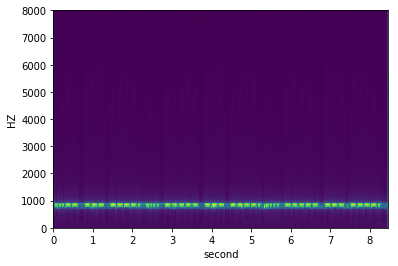

In [52]:
fltr_4 = my_fir_filter(len(wav_4), [750*2/rate_4, 850*2/rate_4], False)
plot_filter(rate_4, fltr_4)
wav_4_f = ss.convolve(fltr_4,wav_4)[int(len(wav_4)/2):int(len(wav_4)/2 * 3)]
plot_wav(rate_4,wav_4_f)

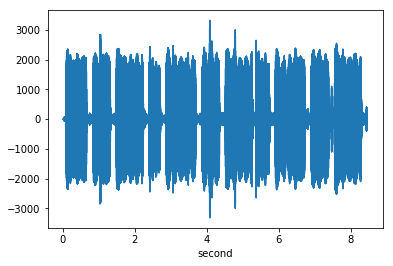

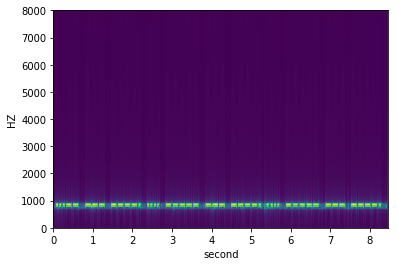

In [50]:
b,a = ss.iirfilter(6, [750*2/rate_4, 850*2/rate_4], btype = 'bandpass', output = 'ba')
wav_4_f = ss.lfilter(b,a,wav_4)
plot_wav(rate_4,wav_4_f)